# READING IMAGE REFERENCE DATA FOR POSE MAPPING
In this notebook, we evaluate the RDF GRAPHS in a session repository.
For every IMAGENODE resource, a IMAGENODE metadata class is created and its data is loaded. 
The following files will be imported and represented in memory
>imagenodelist[]

>This codebase operates on the scan2bim2.yml environment (python 3.8)

In [1]:
# import APIs
import rdflib
from rdflib import Graph, plugin
from rdflib.serializer import Serializer #pip install rdflib-jsonld https://pypi.org/project/rdflib-jsonld/
from rdflib import Graph
from rdflib import URIRef, BNode, Literal
from rdflib.namespace import CSVW, DC, DCAT, DCTERMS, DOAP, FOAF, ODRL2, ORG, OWL, \
                           PROF, PROV, RDF, RDFS, SDO, SH, SKOS, SOSA, SSN, TIME, \
                           VOID, XMLNS, XSD

import os.path, time
import importlib
import PIL
import PIL.Image as PILimage
from PIL import ImageDraw, ImageFont, ImageEnhance
from PIL.ExifTags import TAGS, GPSTAGS
import xml.etree.ElementTree as ET
import numpy as np
import open3d as o3d

#IMPORT MODULES
from context import geomapi 
from geomapi.nodes import *
import geomapi.utils as ut
from geomapi.utils import geometryutils as gmu
import geomapi.tools as tl

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

## 1. INITIALIZE SESSION

In [2]:
## INPUTS
projectPath= os.path.abspath(os.path.join(os.getcwd(), os.pardir))+"\\tests"#"D:\\Data\\2018-06 Werfopvolging Academiestraat Gent" 
sessionPath = projectPath + "\\Samples1" #"K:\Projects\2025-03 Project FWO SB Jelle\7.Data\21-11 House Maarten\RAW data\session_22-03-13 canon


## 2. READ AND MERGE All THE RDF GRAPHS IN THE SESSION (save for feature.ttl files)

In [4]:
## read all graph files in a session and merge them
allSessionPaths=ut.get_list_of_files(sessionPath) 
graphPaths=[]

# collect all RDF graphs in the session
sessionGraph = Graph()
for file in allSessionPaths:        
    if 'imgGraph' in file: 
        graphPaths.append(file)
        sessionGraph.parse(file)     
        print('Graph found with '+str(len(sessionGraph)) +' triples')

Graph found with 34 triples


In [5]:
#test
print(sessionGraph.serialize())

@prefix e57: <http://libe57.org#> .
@prefix openlabel: <https://www.asam.net/index.php?eID=dumpFile&t=f&f=3876&token=413e8c85031ae64cc35cf42d0768627514868b2f#> .
@prefix v4d: <https://w3id.org/v4d/core#> .
@prefix xcr: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

<http://IMG_2173> a "<class 'geomapi.imagenode.ImageNode'>" ;
    e57:cartesianTransform """[[-0.05442451  0.08978218  0.99447329 -8.94782375]
 [-0.78368672 -0.62101649  0.01317728 11.25314019]
 [ 0.6187674  -0.77863835  0.10415962  6.54284524]
 [ 0.          0.          0.          1.        ]]""" ;
    xcr:distortionCoeficients "[-0.12611544  0.09818321  0.03120445  0.          0.          0.        ]" ;
    xcr:focalLength35mm "24.3771542355288" ;
    xcr:principalPointU "-0.00291855667677505" ;
    xcr:principalPointV "-0.00415035446181888" ;
    v4d:accuracy "0.1" ;
    v4d:guid "{678fb3ca-d030-11ec-bfd3-c8f75043ce59}" ;
    v4d:path "IMG_2173.JPG" ;
    v4d:subject "http://IMG_2173" ;
    v4d:xmpPath "IMG_2173.xmp" ;

# 3. An ImageNode is created per image subject in the RDF Graph

In [6]:
nodelist=tl.graph_to_nodes(sessionGraph,sessionPath=sessionPath)
print (str(len(nodelist))+' ImageNodes succesfully created from the session!')

3 ImageNodes succesfully created from the session!


## 4. IMPORT IMAGES 
import data for each imagenode present

In [7]:
for node in nodelist:
    node.get_data()

imglist=[node.img for node in nodelist if node.img is not None]
print (str(len(imglist))+' of '+str(len(nodelist))+ ' ImageNodes have their data imported!')

2 of 3 ImageNodes have their data imported!


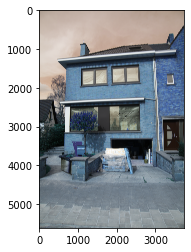

In [8]:
import matplotlib.pyplot as plt
plt.imshow(nodelist[0].img)
